In [1]:
import pandas as pd
import numpy as np
np.seterr(divide = 'ignore') 

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from patsy import dmatrix

from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,LabelEncoder

##module for adding all EDA features in the dataset
from ImportData_EDAFeatures import CreateDF_UntilEDA

from scipy import stats 

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset,dependent_variable,numerical_features,categorical_features = CreateDF_UntilEDA('PredictRoomBooking')

In [3]:
dataset.rename(columns={'AdjustedLeadTimeCumulativeNumberOfRooms':'AdjustedLeadTime_CumulativeNumberOfRooms',
                        'AdjustedLeadTimeCumulativeNumberOfRoomsSubstract':'AdjustedLeadTime_CumulativeNumberOfRoomsSubstract',
                        'AdjustedLeadTimeCumulativeNumberOfRoomsNet':'AdjustedLeadTime_CumulativeNumberOfRoomsNet',
                        'AdjustedLeadTimeCumulativeRevenue':'AdjustedLeadTime_CumulativeRevenue',
                        'AdjustedLeadTimeCumulativeRevenueSubstract':'AdjustedLeadTime_CumulativeRevenueSubstract',
                        'AdjustedLeadTimeCumulativeRevenueNet':'AdjustedLeadTime_CumulativeRevenueNet',
                        'AdjustedLeadTimeCumulativeNumberOfRoomsNetQuartile':'AdjustedLeadTime_CumulativeNumberOfRoomsNetQuartile'},
               inplace=True)

### Binning

In [4]:
#Binning AdjustedLeadTime_CumulativeNumberOfRoomsNet into 10 percentiles
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetQuartile'] = pd.qcut(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'], q=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetQuartile']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetQuartile
0,7400.0,80-90
1,7326.0,80-90
2,7252.0,80-90
3,7178.0,80-90
4,7104.0,80-90
5,7030.0,70-80
6,6956.0,70-80
7,6882.0,70-80


### Square and Cube

In [5]:
## Square
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetSquare'] = np.power(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'], 2)
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetSquare']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetSquare
0,7400.0,54760000.0
1,7326.0,53670276.0
2,7252.0,52591504.0
3,7178.0,51523684.0
4,7104.0,50466816.0
5,7030.0,49420900.0
6,6956.0,48385936.0
7,6882.0,47361924.0


In [6]:
## Cube
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetCube'] = np.power(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'], 3)
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetCube']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetCube
0,7400.0,4.052240e+11
1,7326.0,3.931884e+11
2,7252.0,3.813936e+11
3,7178.0,3.698370e+11
4,7104.0,3.585163e+11
5,7030.0,3.474289e+11
6,6956.0,3.365726e+11
7,6882.0,3.259448e+11


In [7]:
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt'] = np.sqrt(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'])

### Regression Spline

In [8]:
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt']
basis_feature = dmatrix("bs(dataset.AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt, knots=(30,50), degree=3, include_intercept=False)", {"dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt']": dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt']}, return_type='dataframe')

basis_feature.head()

# We will not run the regression here
spl_mod = sm.GLM(dataset.TotalRooms, basis_feature).fit()
spl_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TotalRooms   No. Observations:                81103
Model:                            GLM   Df Residuals:                    81097
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          2115.9
Method:                          IRLS   Log-Likelihood:            -4.2559e+05
Date:                Wed, 07 Dec 2022   Deviance:                   1.7159e+08
Time:                        11:11:23   Pearson chi2:                 1.72e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7135
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================================
                                                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                            48.5354      0.900     53.900      0.000      46.771      50.300
bs(dataset.AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt, knots=(30, 50), degree=3, include_intercept=False)[0]   -26.2399      1.561    -16.811      0.000     -29.299     -23.181
bs(dataset.AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt, knots=(30, 50), degree=3, include_intercept=False)[1]    37.9627      1.083     35.061      0.000      35.841      40.085
bs(dataset.AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt, knots=(30, 50), degree=3, include_intercept=False)[2]   146.5406      1.632     89.793      0.000     143.342     149.739
bs(dataset.AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt, knots=(30, 50), degree=3, include_intercept=False)[3]   127.4780      2.181     58.456      0.000     123.204     131.752
bs(dataset.AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt, knots=(30, 50), degree=3, include_intercept=False)[4]   194.8485      2.754     70.760      0.000     189.451     200.246
=====================================================================================================================================================================================
"""

### Square Root and Cube Root

In [9]:
## Square Root
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt'] = np.sqrt(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetSqrt
0,7400.0,86.023253
1,7326.0,85.592056
2,7252.0,85.158675
3,7178.0,84.723078
4,7104.0,84.285230
5,7030.0,83.845095
6,6956.0,83.402638
7,6882.0,82.957821


In [10]:
## Cube Root
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetCbrt'] = np.cbrt(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetCbrt']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetCbrt
0,7400.0,19.486952
1,7326.0,19.421777
2,7252.0,19.356163
3,7178.0,19.290100
4,7104.0,19.223582
5,7030.0,19.156600
6,6956.0,19.089147
7,6882.0,19.021214


### Log Transformation

In [11]:
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetLog'] = np.log(dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNet'])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetLog']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetLog
0,7400.0,8.909235
1,7326.0,8.899185
2,7252.0,8.889033
3,7178.0,8.878776
4,7104.0,8.868413
5,7030.0,8.857942
6,6956.0,8.847360
7,6882.0,8.836665


### Standardization and Normalization

In [12]:
## Standardization
standscalter = StandardScaler()
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetStand'] = standscalter.fit_transform(dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet']])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetStand']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetStand
0,7400.0,0.806663
1,7326.0,0.788851
2,7252.0,0.771038
3,7178.0,0.753226
4,7104.0,0.735413
5,7030.0,0.717600
6,6956.0,0.699788
7,6882.0,0.681975


In [13]:
#Normalization
minmaxscalter = MinMaxScaler()
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetMinMax'] = minmaxscalter.fit_transform(dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet']])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetMinMax']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetMinMax
0,7400.0,0.330357
1,7326.0,0.327054
2,7252.0,0.323750
3,7178.0,0.320446
4,7104.0,0.317143
5,7030.0,0.313839
6,6956.0,0.310536
7,6882.0,0.307232


### Yeo-Johnson

In [14]:
## Yeo-Johnson
yeojohnson = PowerTransformer(method='yeo-johnson')
dataset['AdjustedLeadTime_CumulativeNumberOfRoomsNetYeo'] = yeojohnson.fit_transform(dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet']])
dataset[['AdjustedLeadTime_CumulativeNumberOfRoomsNet','AdjustedLeadTime_CumulativeNumberOfRoomsNetYeo']].head(8)

,AdjustedLeadTime_CumulativeNumberOfRoomsNet,AdjustedLeadTime_CumulativeNumberOfRoomsNetYeo
0,7400.0,0.954827
1,7326.0,0.944639
2,7252.0,0.934379
3,7178.0,0.924044
4,7104.0,0.913634
5,7030.0,0.903148
6,6956.0,0.892583
7,6882.0,0.881939


### Box-Cox

In [15]:
#import car sales data, as it's numerical features do not have 0 value
dataset,dependent_variable,numerical_features,categorical_features = CreateDF_UntilEDA('CarSales')

dataset.rename(columns={'kmdriven':'km_driven'},inplace=True)


## Boxcox
boxcox = PowerTransformer(method='box-cox')
dataset['km_drivenBoxCox'] = boxcox.fit_transform(dataset[['km_driven']])
dataset[['km_driven','km_drivenBoxCox']].head(8)

,km_driven,km_drivenBoxCox
0,145500,1.412960
1,120000,1.075766
2,140000,1.343636
3,127000,1.172557
4,120000,1.075766
5,45000,-0.319823
6,175000,1.758799
7,5000,-2.117966


In [16]:
def four_plots(best_column,feature,dependent_variable,corr_df,original_corr,best_corr):
    
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set(style="darkgrid")
    sns.set_context('paper', font_scale = 1.9)
    
    fig, axs = plt.subplots(ncols=2,nrows=1)
    fig.subplots_adjust(hspace=0.3)
    
    axes0 = axs[0]
    axes0.plot(corr_df[dependent_variable[0]].values,corr_df[feature].values,marker='.')#,marker='o',s = 50)
#     axes0.set_xticklabels(labels = corr_df[feature].values)
    axes0.set_title('Original Feature Correlation: '+str(original_corr))
    axes0.set_xlabel(dependent_variable[0])
    axes0.set_ylabel(feature)
    
    axes1 = axs[1]
    axes1.plot(corr_df[dependent_variable[0]].values,corr_df[best_column].values,marker='.')#,s = 50)
#     axes1.set_xticklabels(labels = corr_df[best_column].values)
    axes1.set_title('Transformed Feature Correlation: '+str(best_corr))
    axes1.set_xlabel(dependent_variable[0])
    axes1.set_ylabel(best_column)
    plt.show()

In [17]:
def check_corr(corr_df,feature,dependent_variable):
    
    original_corr = round(np.corrcoef(corr_df[dependent_variable[0]].values,corr_df[feature].values)[0][1],3)

    best_column = ''
    best_corr = round(np.corrcoef(corr_df[dependent_variable[0]].values,corr_df[feature].values)[0][1],3)    
    
    for column in corr_df.columns:
        if column not in [dependent_variable[0],feature]:

            ## filter and remove inf rows for log transformed column
            if '_Log' in column:
                log_feature = corr_df[column][corr_df[column].values != -np.inf]
                filtered_dependent = corr_df[dependent_variable[0]][corr_df[column].values != -np.inf]
                new_corr = round(np.corrcoef(log_feature,filtered_dependent)[0][1],3)
                
            else:
                new_corr = round(np.corrcoef(corr_df[dependent_variable[0]].values,corr_df[column].values)[0][1],3)

            #find best correlation
            if abs(new_corr) > abs(best_corr):
                best_corr = new_corr
                best_column = column
    
    if best_column == '':
        #Single plot
        return feature,best_corr,original_corr
    else:
        #process plot
        four_plots(best_column,feature,dependent_variable,corr_df,original_corr=original_corr,best_corr=best_corr)
        return best_column.split('_')[-1], best_corr,original_corr
                
    

def find_numerical_transformation_regression(dataset,feature,dependent_variable):
    standscal = StandardScaler()
    minmax = MinMaxScaler()
    boxcox = PowerTransformer(method='box-cox')
    yeojohnson = PowerTransformer(method='yeo-johnson')
    
    corr_df = pd.DataFrame({feature:dataset[feature].values,dependent_variable[0]:dataset[dependent_variable[0]].values})
    
    #square
    corr_df[feature+'_Square'] = np.power(corr_df[feature], 2)

    #cube
    corr_df[feature+'_Cube'] = np.power(corr_df[feature], 3)
    #sqrt
    corr_df[feature+'_Sqrt'] = np.sqrt(corr_df[feature])
    #cbrt
    corr_df[feature+'_Cbrt'] = np.cbrt(corr_df[feature])
    #log
    corr_df[feature+'_Log'] = np.log(corr_df[feature])
    #standard scaler
    corr_df[feature+'_Stand'] = standscal.fit_transform(corr_df[[feature]])
    #minmax
    corr_df[feature+'_MinMax'] = minmax.fit_transform(corr_df[[feature]])
    #boxcox
    if 0 not in corr_df[feature].values:
        corr_df[feature+'_BoxCox'] = boxcox.fit_transform(corr_df[[feature]])
    #yeo-johnson
    corr_df[feature+'_Yeo'] = yeojohnson.fit_transform(corr_df[[feature]])
    
    ##check correlation
    feature_transformed,best_corr,original_corr = check_corr(corr_df,feature,dependent_variable)
    
    if feature_transformed == feature:
        return 'Original feature is best feature.'
    else:
        return 'Best transformation is: '+feature_transformed+', with correlation '+str(best_corr)+'. Original correlation is:'+str(original_corr)+'.'

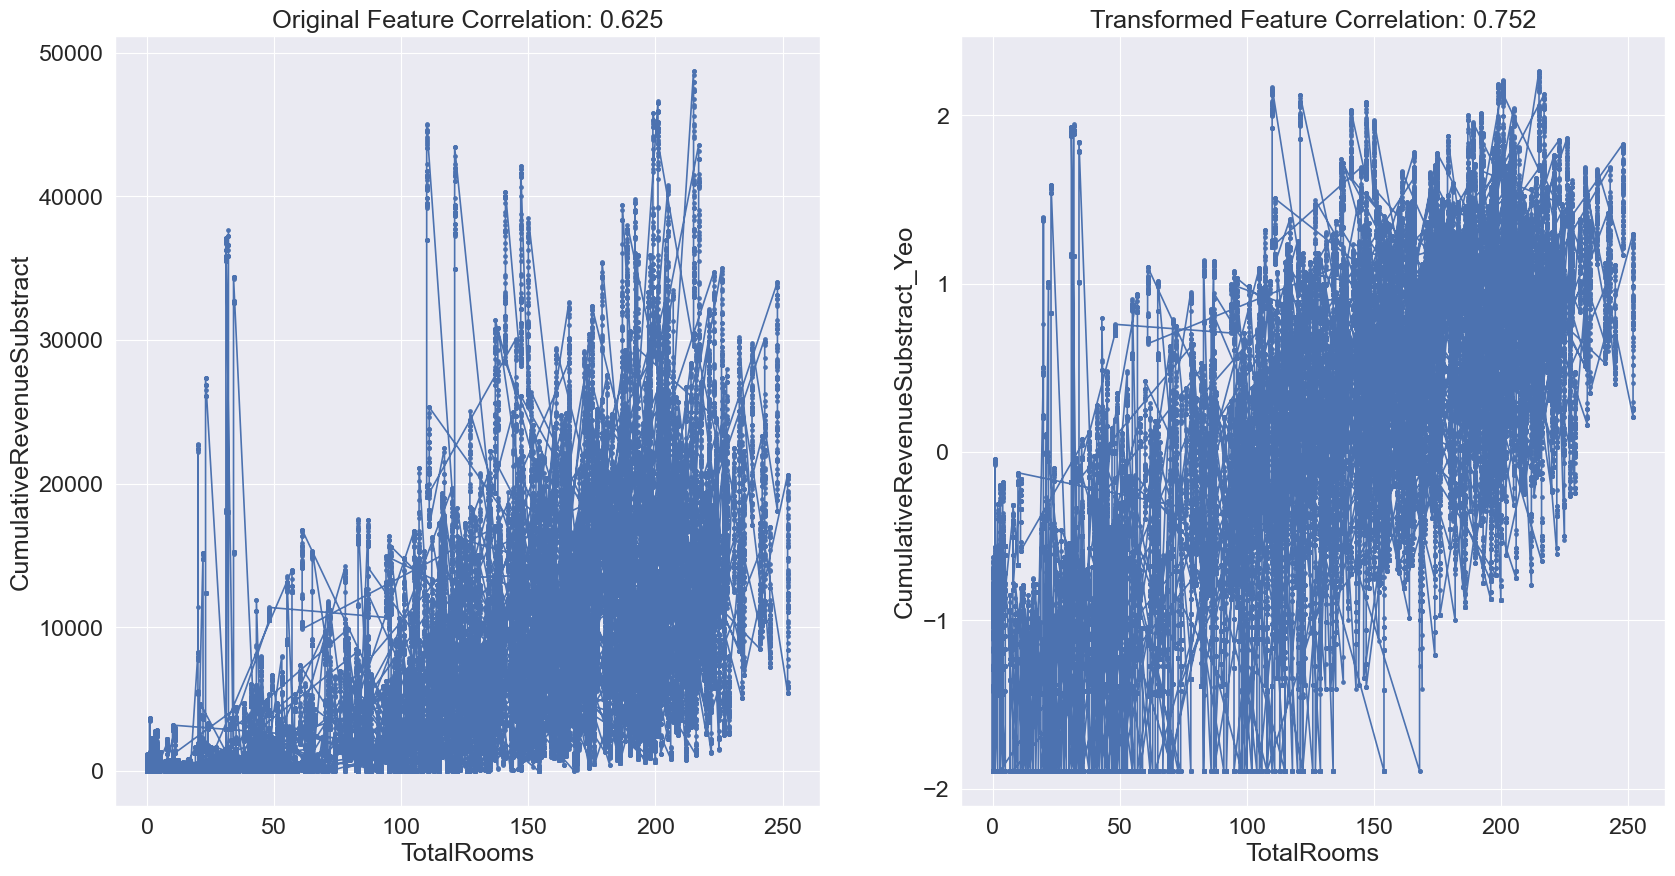

Feature: CumulativeRevenueSubstract. Best transformation is: Yeo, with correlation 0.752. Original correlation is:0.625.



In [18]:
dataset,dependent_variable,numerical_features,categorical_features = CreateDF_UntilEDA('PredictRoomBooking')
4,10,12
feature_indx = 12
feature = numerical_features[feature_indx]
print('Feature: '+feature+'. '+find_numerical_transformation_regression(dataset,feature,dependent_variable)+'\n')